In [ ]:
! pip install jovian opendatasets --quiet

In [5]:
import os
import jovian # used to save the trained data
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [6]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
train_df = pd.read_csv('C:\\Users\\dell\\Downloads\\rossmann-store-sales\\train.csv',low_memory=False)

In [8]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


sample_submission,
store,
test

In [9]:
store_df = pd.read_csv('C:\\Users\\dell\\Downloads\\rossmann-store-sales\\store.csv')

In [10]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### we can see that `store_df` is containing the important data so we can add this to the `train_df` for more better understanding

In [11]:
merged_df = train_df.merge(store_df,how='left',on='Store')

In [12]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
merged_df.shape

(1017209, 18)

In [14]:
test_df= pd.read_csv('C:\\Users\\dell\\Downloads\\rossmann-store-sales\\test.csv')
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [15]:
merged_test = test_df.merge(store_df,how='left',on='Store')
merged_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [16]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [17]:
merged_df.describe().T   #is used to transpose in to rows as columns and vice versa

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


In [18]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [19]:
# we have to parse the date columns from object to the Date Type.

In [20]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [21]:
merged_test['Date'] = pd.to_datetime(merged_test['Date'])

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [23]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [24]:
merged_df['Date'].min(),merged_df['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [25]:
merged_test['Date'].min(),merged_test['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

- According to the test data we can say that ewe have to predict the sales for 8th and 9th month of 2015

## Exploratory Data Analysis and Visualization

### Objectives of Exploratory Data Analysis:
- Study the distributions of individual columns (uniform, normal, exponential)  
- Detect anomalies or errors in the data (e.g., missing/incorrect values)  
- Study the relationship of target column with other columns (linear, non-linear etc.)  
- Gather insights about the problem and the dataset  
- Come up with ideas for preprocessing and feature engineering  


<Axes: xlabel='Sales', ylabel='Count'>

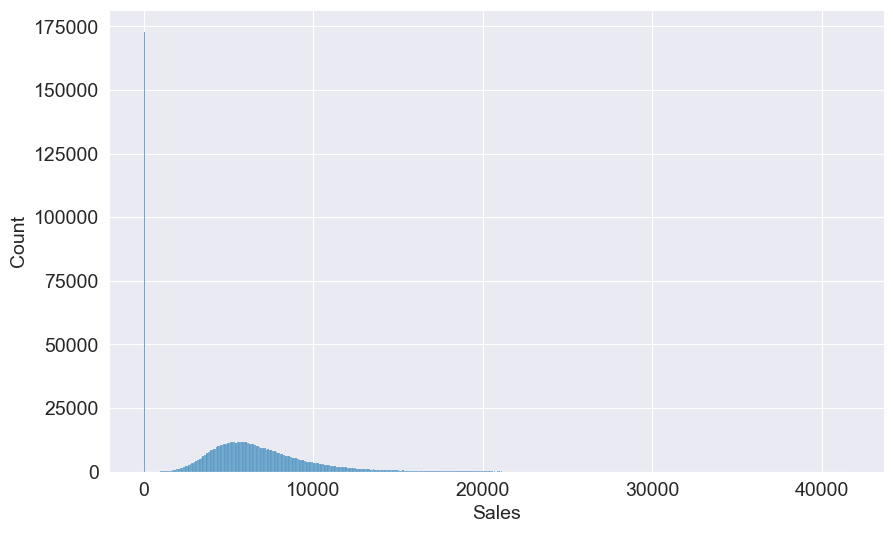

In [26]:
fig =sns.histplot(merged_df,x='Sales')
fig

### here there are lots of rows that containing the  0 -> which is store not opened
- so it is diffcult to predict the sales for the linear model because it cannot understand the open and close.
- if use use the decision tree then it would be going to helpful because it can learn by splitting the data.
- but i think it is good to not to include the 0 in the dataset

In [27]:
merged_df = merged_df[merged_df.Open==1].copy()

In [28]:
merged_df['Open'].unique()

array([1], dtype=int64)

<Axes: xlabel='Sales', ylabel='Count'>

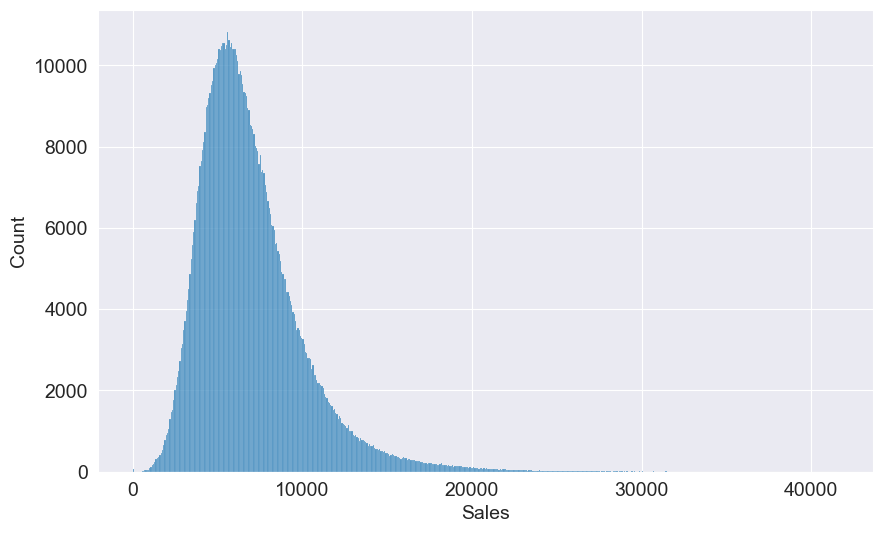

In [29]:
# trying to plot the same plot

sns.histplot(data=merged_df,x='Sales')

In [30]:
### Exploring some other columns

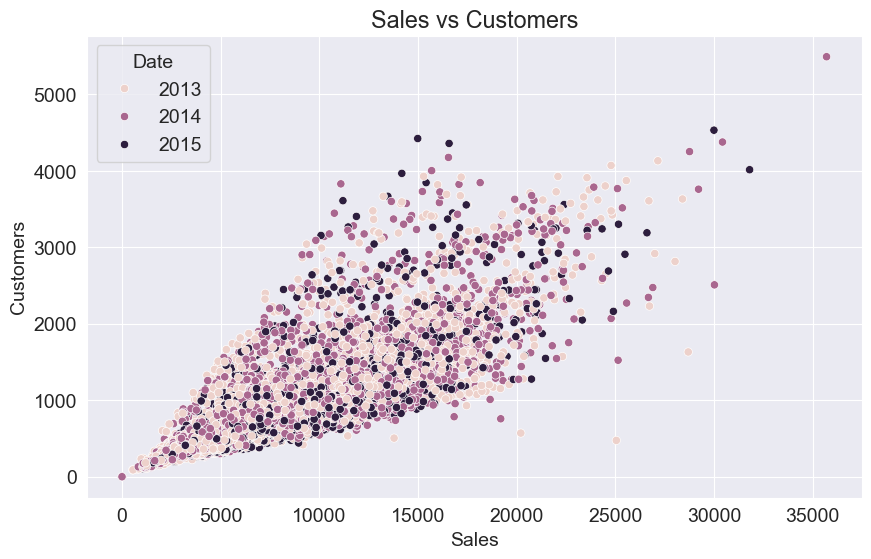

In [31]:
plt.figure(figsize=(10,6))
temp_df = merged_df.sample(40000)
sns.scatterplot(data=temp_df,x='Sales',y='Customers',hue=temp_df.Date.dt.year)
plt.title('Sales vs Customers')
plt.show()

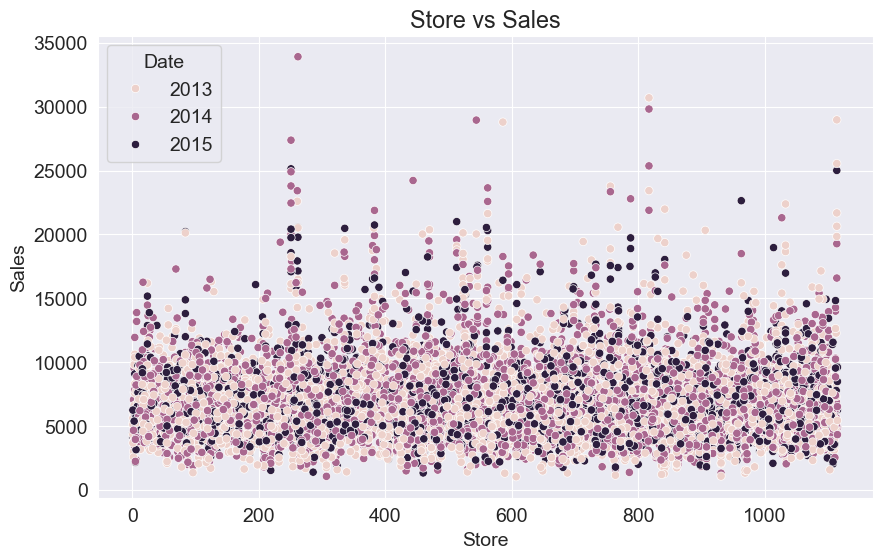

In [32]:
plt.figure(figsize=(10,6))
temp_df = merged_df.sample(10000)
sns.scatterplot(data=temp_df,x='Store',y='Sales',hue=temp_df.Date.dt.year)
plt.title('Store vs Sales')
plt.show()

In [33]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

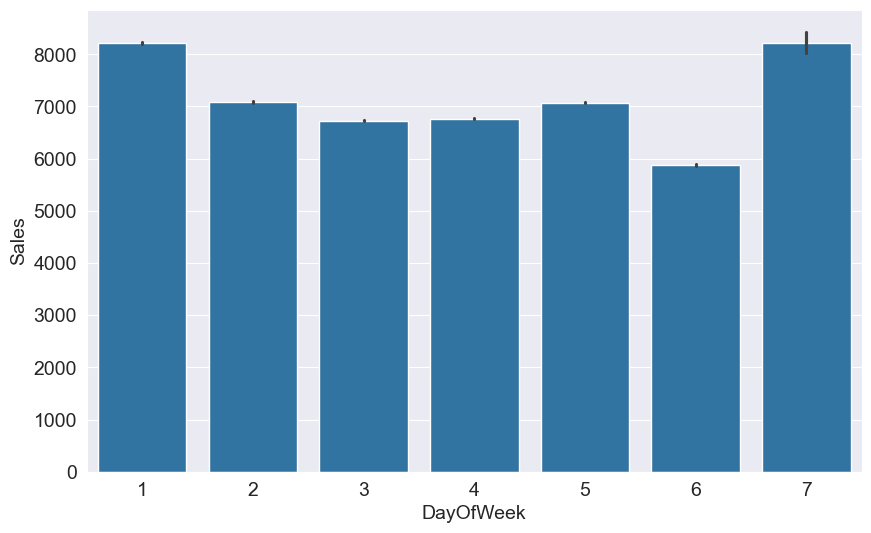

In [34]:
sns.barplot(data=merged_df,x='DayOfWeek',y='Sales')

<Axes: xlabel='StateHoliday', ylabel='Sales'>

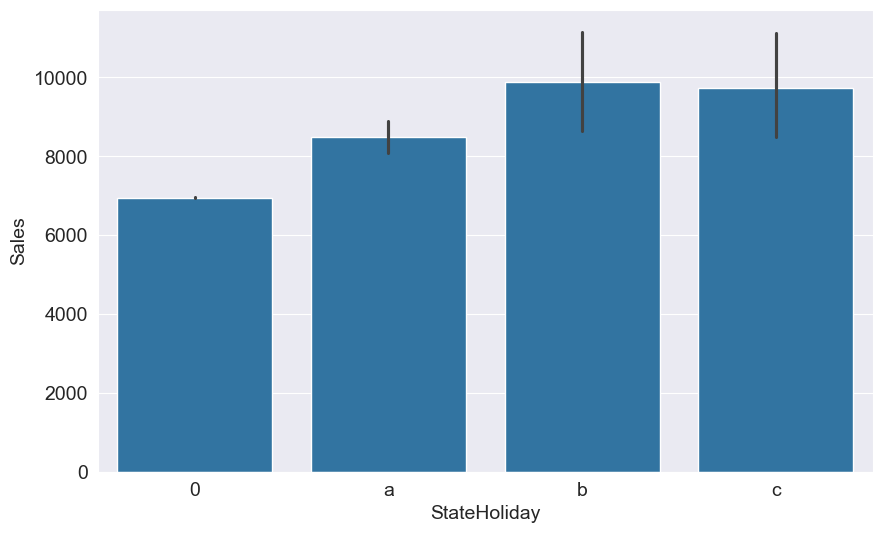

In [35]:
sns.barplot(data=merged_df,x='StateHoliday',y='Sales')

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

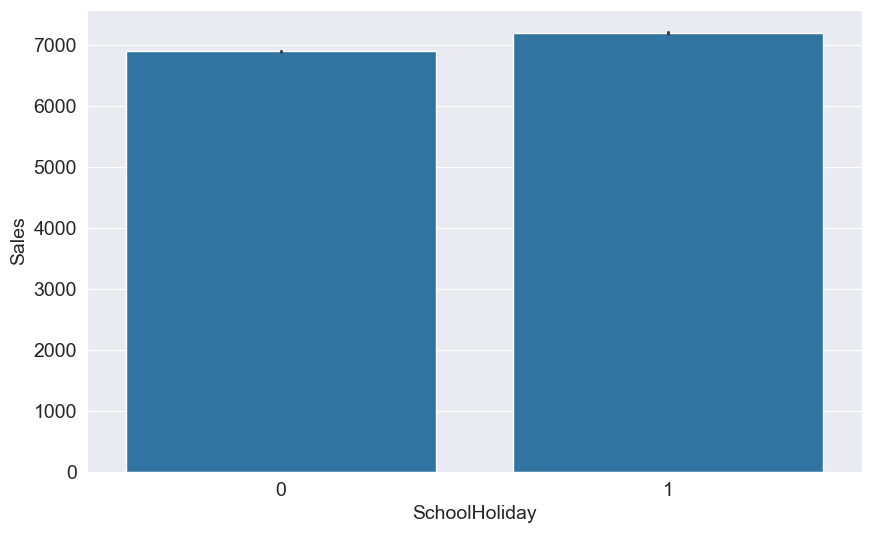

In [36]:
sns.barplot(data=merged_df,x='SchoolHoliday',y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

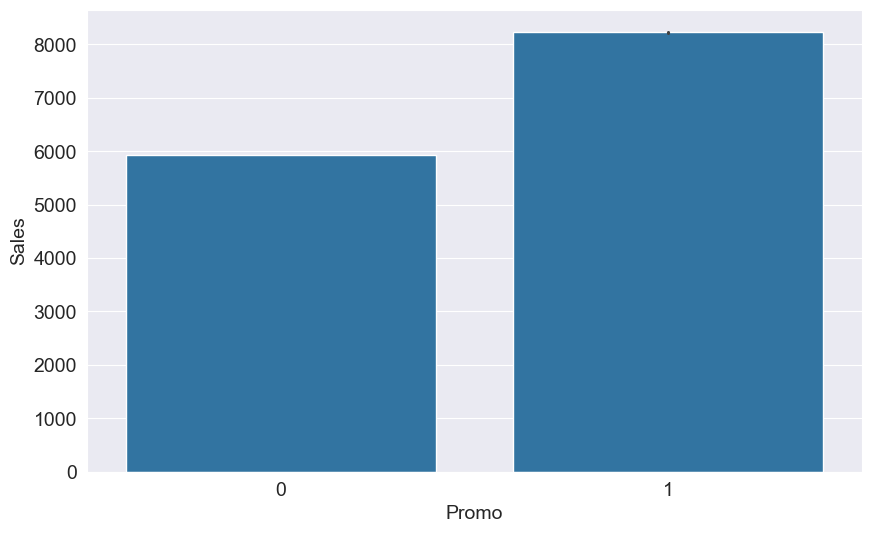

In [37]:
sns.barplot(data=merged_df,x='Promo',y='Sales')

<Axes: xlabel='Promo2', ylabel='Sales'>

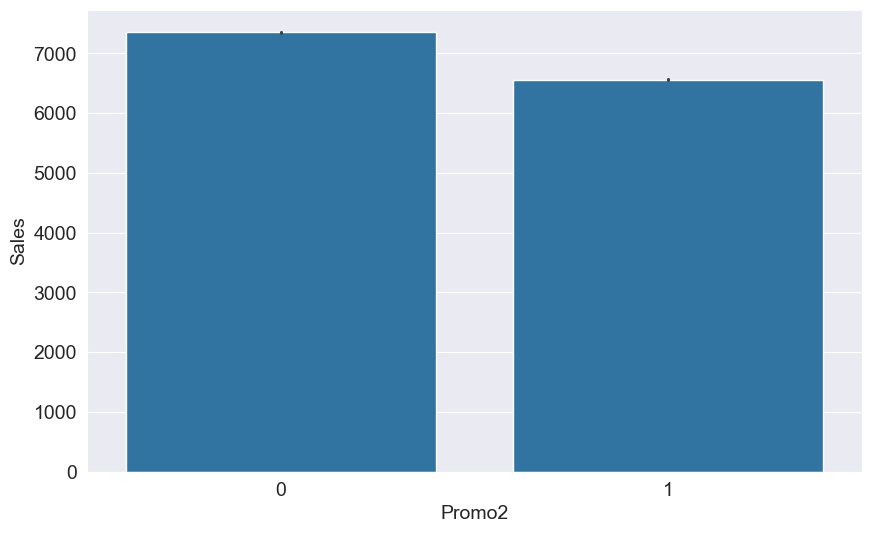

In [38]:
sns.barplot(data=merged_df,x='Promo2',y='Sales')

<Axes: xlabel='Date', ylabel='Sales'>

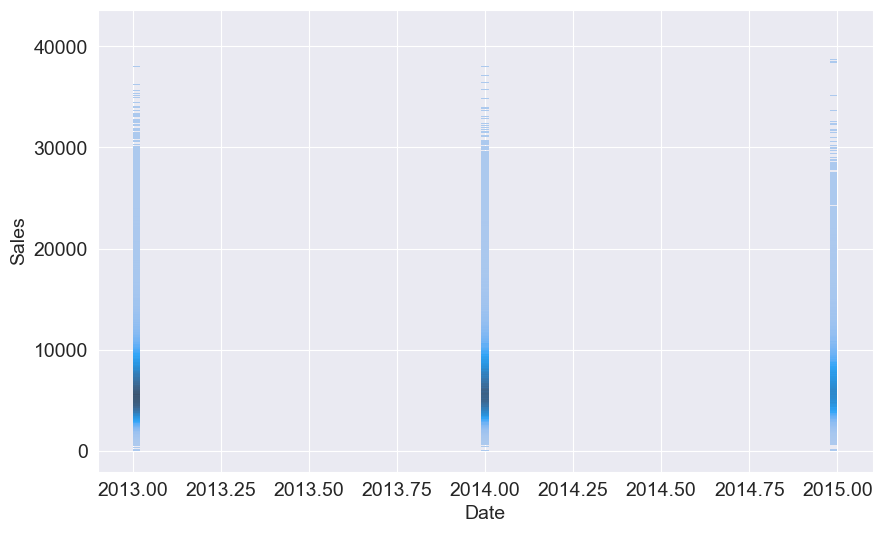

In [39]:
sns.histplot(data=merged_df,x=merged_df.Date.dt.year,y='Sales')

In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64     

In [41]:
numerical_cols = merged_df.select_dtypes(include=[np.number])

In [42]:
numerical_cols.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,NaN,NaN


In [43]:
categorical_cols = merged_df.select_dtypes(include='object')

In [44]:
categorical_cols.head()

,StateHoliday,StoreType,Assortment,PromoInterval
0,0,c,a,NaN
1,0,a,a,"Jan,Apr,Jul,Oct"
2,0,a,a,"Jan,Apr,Jul,Oct"
3,0,c,c,NaN
4,0,a,a,NaN


In [45]:
corr_sales=numerical_cols.corr()[['Sales']]

<Axes: >

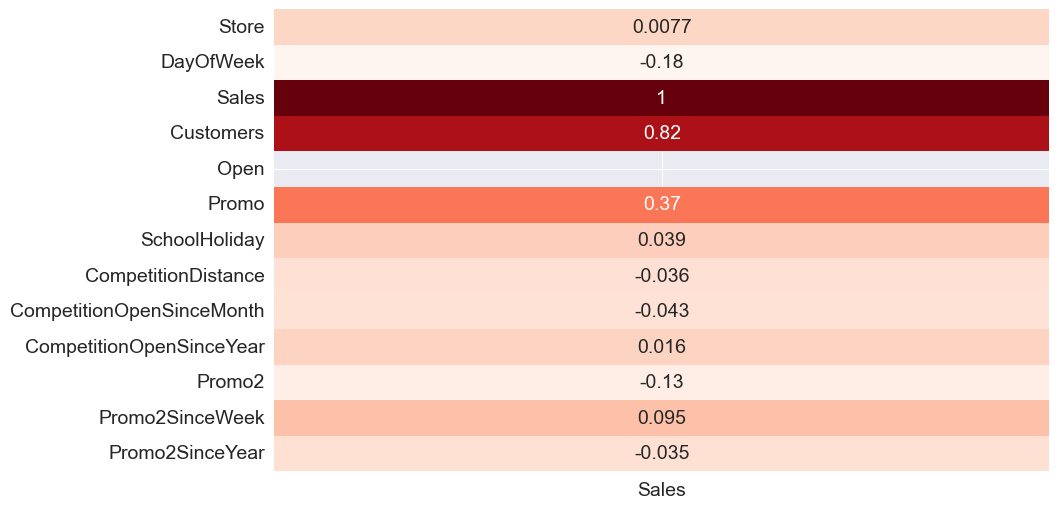

In [46]:
sns.heatmap(corr_sales,cmap='Reds',cbar=False,annot=True)

### Feature Engineering
- Extracting the Day,Month,Year from the Date columns and making individual columns.

In [47]:
merged_df['Day'] = merged_df.Date.dt.day

In [48]:
merged_df['Month'] = merged_df.Date.dt.month

In [49]:
merged_df['Year'] = merged_df.Date.dt.year

In [50]:
merged_test['Day'] = merged_test.Date.dt.day

In [51]:
merged_test['Month'] = merged_test.Date.dt.month

In [52]:
merged_test['Year'] = merged_test.Date.dt.year

In [53]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015


In [54]:
merged_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,17,9,2015
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",17,9,2015
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,17,9,2015
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,17,9,2015
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,17,9,2015


<Axes: xlabel='Year', ylabel='Sales'>

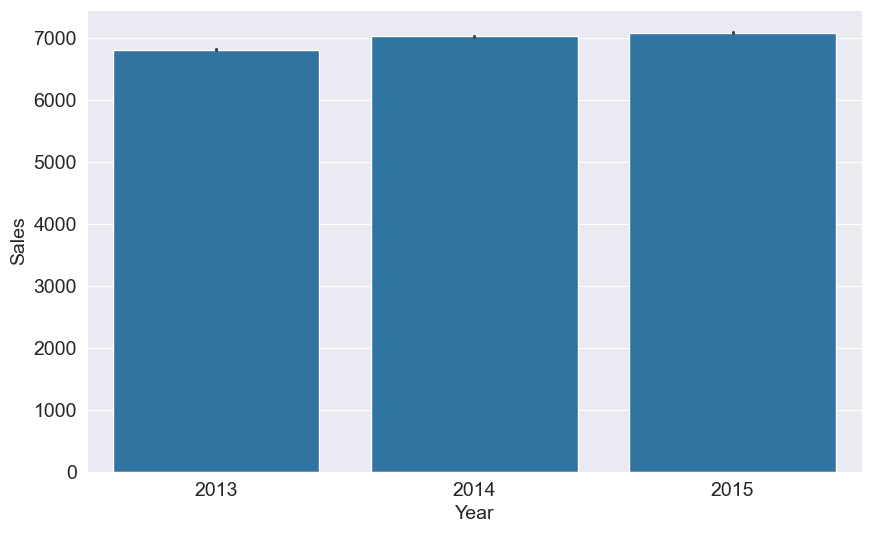

In [55]:
sns.barplot(data=merged_df,x='Year',y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

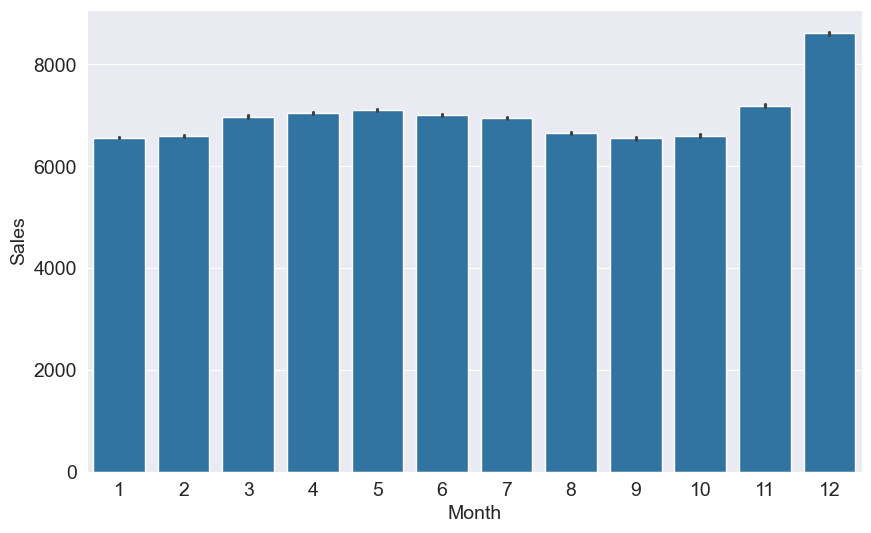

In [56]:
sns.barplot(data=merged_df,x='Month',y='Sales')

In [57]:
len(merged_df)

844392

In [58]:
#considering the train and validation sets  and test set is already existed.

In [59]:
train_size = int(.75*len(merged_df))
train_size

633294

In [60]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size],sorted_df[train_size:]

In [61]:
train_df.shape

(633294, 21)

In [62]:
val_df.shape

(211098, 21)

In [63]:
sorted_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013


In [64]:
train_df.Date.min(),train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [65]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [66]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [67]:
merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             1
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
Day                             31
Month                           12
Year                             3
dtype: int64

In [68]:
inputs = ['Store','DayOfWeek','Promo','StoreType','Assortment','Day','Month','Year','StateHoliday']

In [69]:
targets = 'Sales'

In [70]:
train_input = train_df[inputs].copy()
train_target = train_df[targets].copy()

In [71]:
val_input = val_df[inputs].copy()
val_target = val_df[targets].copy()

In [72]:
test_input = merged_test[inputs].copy()
# test data donot hae any targets

In [73]:
numerical_cols = ['Store','Day','Month','Year']

In [74]:
categorical_cols = ['DayOfWeek','Promo','StateHoliday','StoreType','Assortment']

### imputation of numerical_cols

In [75]:
from sklearn.impute import SimpleImputer

In [76]:
imputer = SimpleImputer(strategy='mean').fit(train_input[numerical_cols])

In [77]:
train_input[numerical_cols] = imputer.transform(train_input[numerical_cols])

In [78]:
val_input[numerical_cols] = imputer.transform(val_input[numerical_cols])

In [79]:
test_input[numerical_cols] = imputer.transform(test_input[numerical_cols])

In [80]:
train_input[numerical_cols].isnull().sum()

Store    0
Day      0
Month    0
Year     0
dtype: int64

### scaling the numerical_cols

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler().fit(train_input[numerical_cols])

In [83]:
train_input[numerical_cols] = scaler.transform(train_input[numerical_cols])

In [84]:
val_input[numerical_cols] = scaler.transform(val_input[numerical_cols])

In [85]:
test_input[numerical_cols] = scaler.transform(test_input[numerical_cols])

In [86]:
train_input[numerical_cols].describe()

,Store,Day,Month,Year
count,633294.000000,633294.000000,633294.000000,633294.000000
mean,0.500437,0.488868,0.478522,0.466373
std,0.288786,0.290426,0.306317,0.498868
min,0.000000,0.000000,0.000000,0.000000
25%,0.251346,0.233333,0.181818,0.000000
50%,0.500000,0.500000,0.454545,0.000000
75%,0.750449,0.733333,0.727273,1.000000
max,1.000000,1.000000,1.000000,1.000000


### handling the categorical_cols

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
encoder = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore').fit(train_input[categorical_cols])

In [89]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [90]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols] )

In [91]:
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])

In [92]:
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

In [93]:
train_input[encoded_cols].head()

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### lets join the numerical and categorical cols

In [94]:
X_train = train_input[numerical_cols + encoded_cols]

In [95]:
X_val = val_input[numerical_cols + encoded_cols]

In [96]:
X_test = test_input[numerical_cols + encoded_cols]

In [97]:
X_train.shape

(633294, 24)

In [98]:
X_val.shape

(211098, 24)

In [99]:
X_test.shape

(41088, 24)

In [100]:
X_train.head()

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### defining the dumb model like function and checking the RMSE (if you dont know about the ML models it helps to understand)

In [101]:
merged_df.Sales.mean()

6955.514290755952

In [102]:
def return_mean(inputs):
    return np.full(len(inputs),merged_df.Sales.mean())

In [103]:
train_pred = return_mean(X_train)

In [104]:
train_pred

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
rmse=mean_squared_error(train_pred,train_target)

In [107]:
rmse

9501500.735261155

### Using the BaseLine Model `LinearRegression`

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression().fit(X_train,train_target)

In [110]:
pred = model.predict(X_train)
pred

array([ 7115.08762455, 10581.38651873,  7036.39236244, ...,
        6241.95353708,  5997.17125059,  5618.95124099])

In [111]:
## lets evalute the model performance

In [112]:
from sklearn.metrics import mean_squared_error

In [115]:
rmse=mean_squared_error(pred,train_target) 
np.sqrt(rmse)
#mean_squared_error(pred,train_target,squared=False) -> iam not able to use because i have to update the scikit-learn and restart the kernal

2741.587191916578

### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

- **MSE** (Mean Squared Error):

$$
\text{MSE} = 7,516,300.330881027
$$

- **RMSE** (Root Mean Squared Error):

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{7,516,300.330881027} \approx 2741.96
$$

✅ So, if `squared=False` was used in `mean_squared_error`, the output would have been **2741.96** instead of **7516300.33**.


In [116]:
#weights
model.coef_

array([ 1.04613988e+02, -1.00014797e+02,  6.50678489e+02,  1.04413753e+02,
        9.88487856e+02, -1.25115344e+02, -3.95828726e+02, -3.97660124e+02,
       -7.18979775e+00, -6.37157355e+01,  1.02187074e+00, -1.13867445e+03,
        1.13867445e+03, -1.23115139e+02, -5.62555847e+01, -3.90512282e+01,
        2.18421952e+02, -1.23677263e+03,  4.17553271e+03, -1.34703585e+03,
       -1.59172423e+03,  9.42626963e+02, -2.61870726e+03,  1.67608030e+03])

In [117]:
#bias
model.intercept_

6775.38391657328

### we can use the multiple models by defining the function

In [160]:
def try_model(model):
    model.fit(X_train,train_target)

    # generate the predictions
    train_pred=model.predict(X_train)
    val_pred=model.predict(X_val)

    # compute the rmse
    train_rmse = mean_squared_error(train_pred,train_target) # not able to use the {squared=False}
    val_rmse = mean_squared_error(val_pred,val_target)
    
    # returning the rmse scores
    return f"train_rmse:{np.sqrt(train_rmse)},val_rmse:{np.sqrt(val_rmse)}" # that's why i used the {np.sqrt} here to convert


In [161]:
try_model(LinearRegression())

'train_rmse:2741.587191916578,val_rmse:2817.779794011712'

In [120]:
try_model(Ridge())

<IPython.core.display.Javascript object>

'train_rmse:2741.587195081444,val_rmse:2817.7784665409863'

In [121]:
try_model(Lasso())

<IPython.core.display.Javascript object>

'train_rmse:2741.7143904640566,val_rmse:2817.9472924045217'

In [122]:
from sklearn.linear_model import SGDRegressor
try_model(SGDRegressor())

'train_rmse:2743.0354833747356,val_rmse:2811.373271921419'

In [123]:
try_model(ElasticNet())

<IPython.core.display.Javascript object>

'train_rmse:2879.0432103903954,val_rmse:2972.665886050338'

## Observations 
- among all the linear models elastic net is worse. the rmse value has to be low.

### we can use the hyperparameters.
- using the parameters in the models that can help in reducing the rmse value.

In [124]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import accuracy_score

In [125]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

'train_rmse:0.0,val_rmse:1559.7378600480247'

[Text(0.5, 0.875, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.625, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'StoreType_b <= 0.5\nsquared_error = 6681042.292\nsamples = 352553\nvalue = 5848.377'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Assortment_a <= 0.5\nsquared_error = 6056548.123\nsamples = 345345\nvalue = 5774.691'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Assortment_c <= 0.5\nsquared_error = 23877531.412\ns

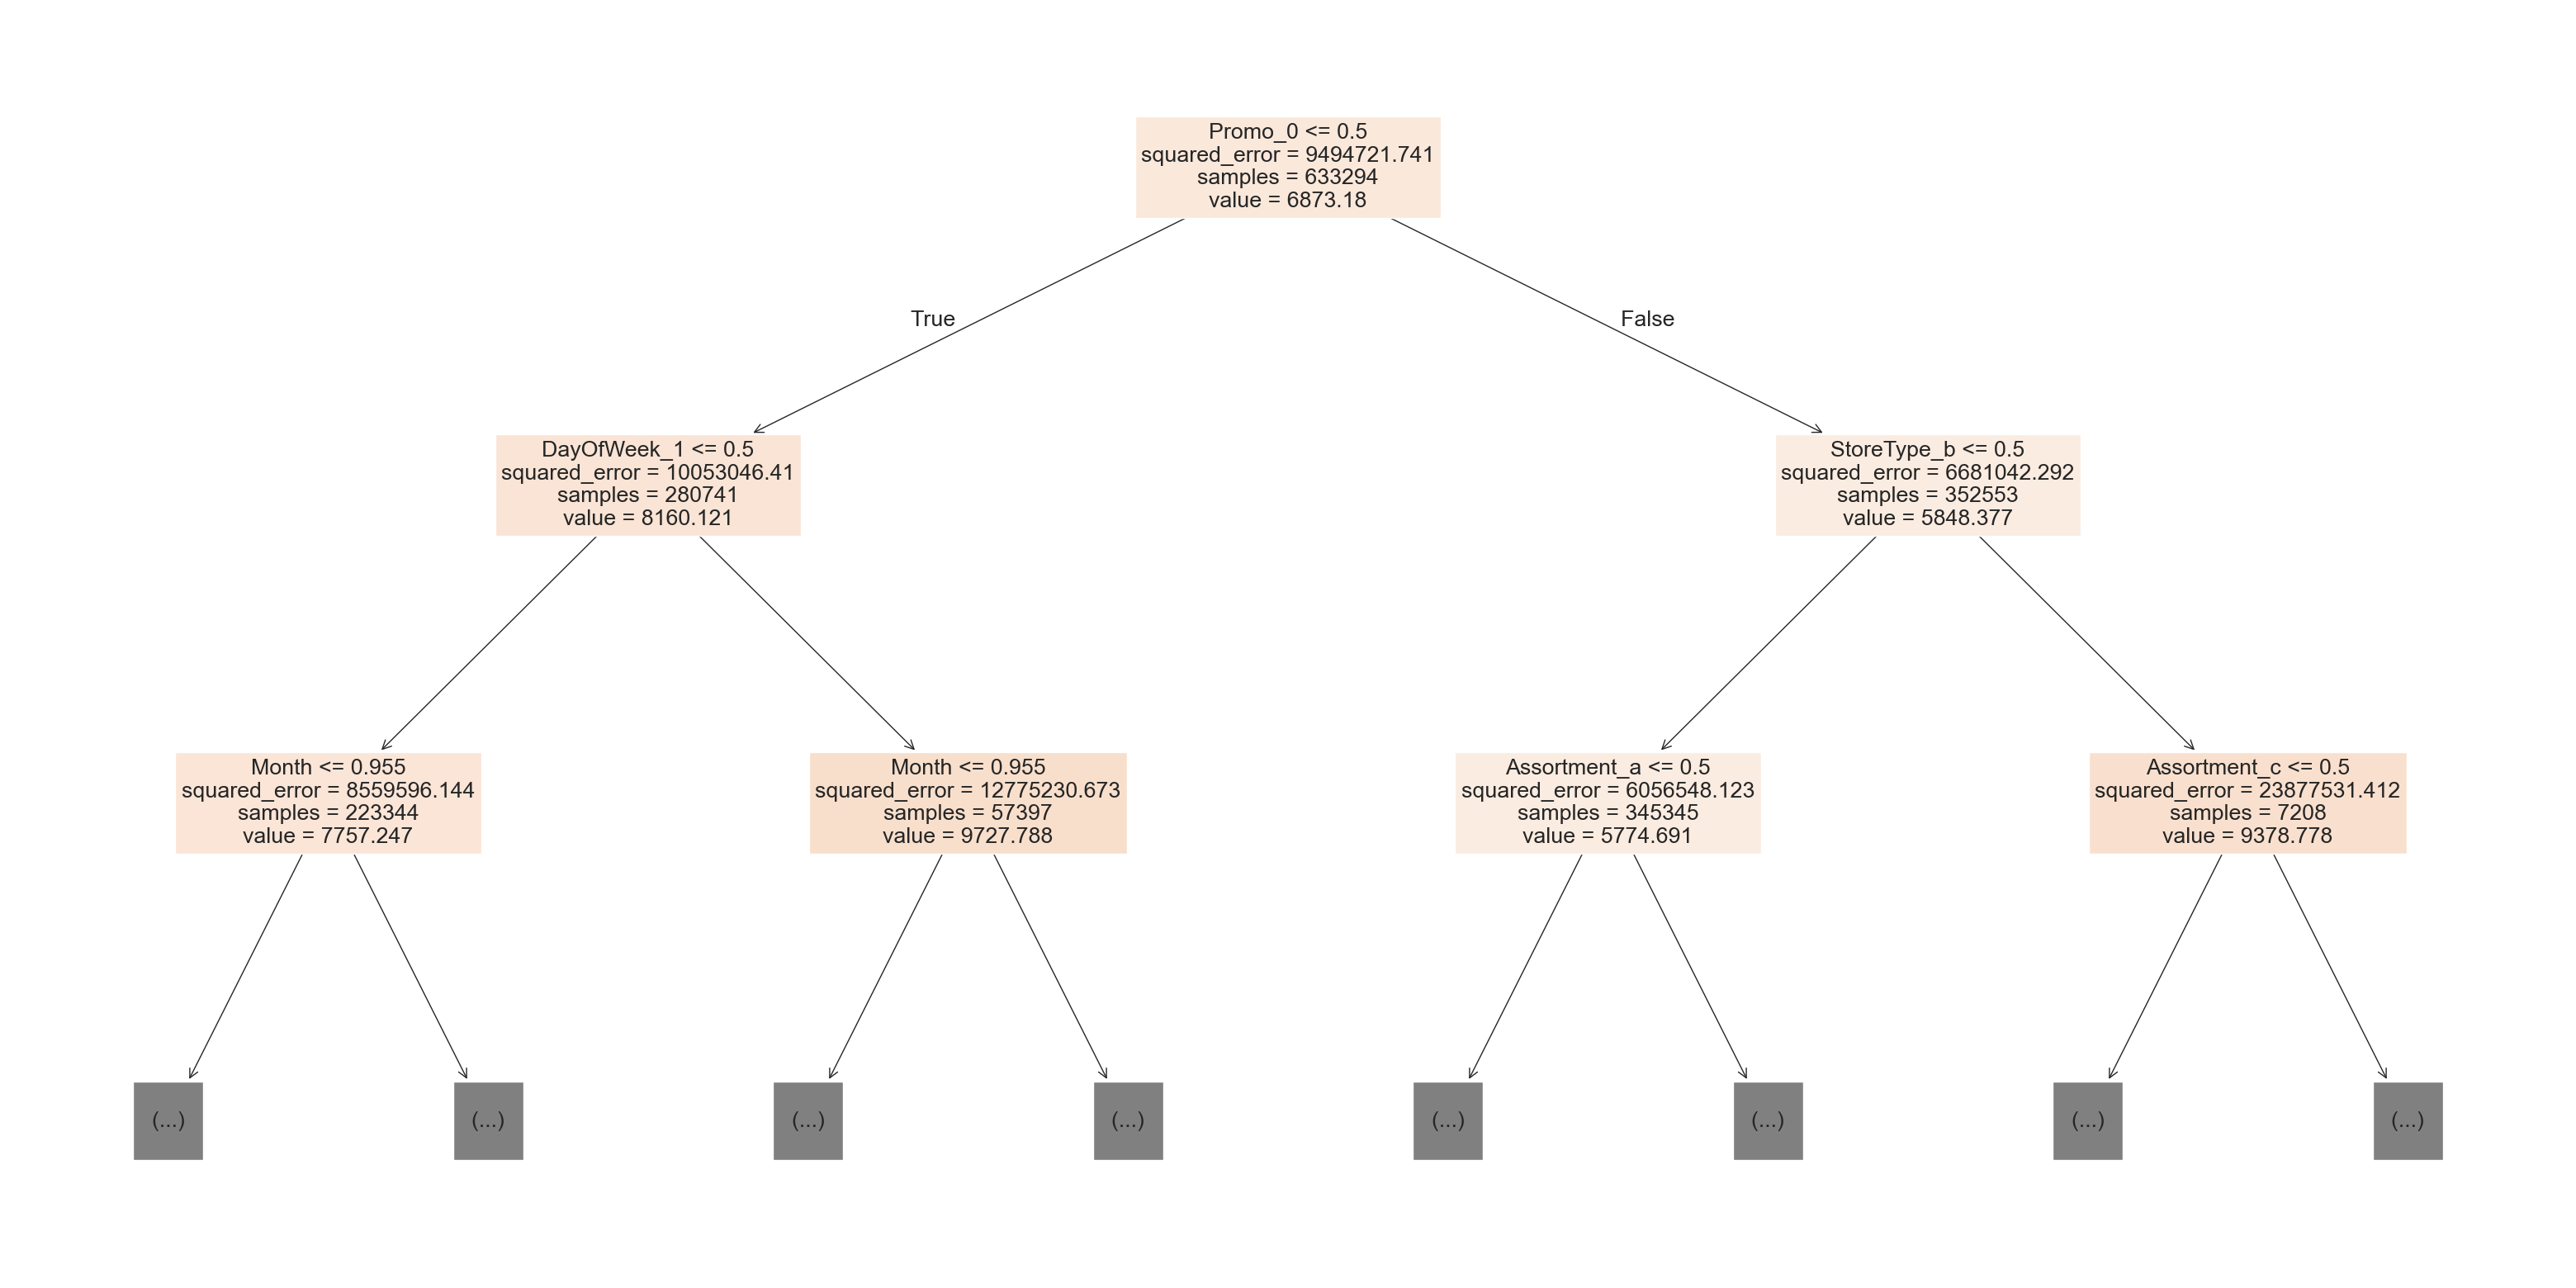

In [126]:
plt.figure(figsize=(40,20))
plot_tree(tree,max_depth=2,filled=True,feature_names=numerical_cols+encoded_cols)

### Observations
- It is far more better than above models which are linear models It has cutted the `error loss` to the half of the above models.

## Let's try random forest regressor

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rf = RandomForestRegressor(random_state=42,n_jobs=-1)
try_model(rf)

'train_rmse:474.9198974666898,val_rmse:1371.7321923469985'

### observation
- `RandomForestRegressor` is better that `Decision Tree`.
- it generalized well.

# K-Fold Cross Validation

**What is it?**  
K-Fold Cross Validation is a technique to evaluate machine learning models by splitting the dataset into *K* equal parts (folds).  
It helps ensure that the model’s performance is not dependent on a particular train-test split.

---

## Steps:
1. Split the dataset into **K folds**.
2. For each iteration:
   - Use **K-1 folds** for training.
   - Use **1 fold** for validation (testing).
3. Repeat this process **K times**, so each fold is used once as the validation set.
4. Compute the average performance across all folds.

---

## Visualization (for K = 5)

| Iteration | Training Folds       | Validation Fold |
|-----------|----------------------|-----------------|
| 1         | 2, 3, 4, 5           | 1               |
| 2         | 1, 3, 4, 5           | 2               |
| 3         | 1, 2, 4, 5           | 3               |
| 4         | 1, 2, 3, 5           | 4               |
| 5         | 1, 2, 3, 4           | 5               |

## Advantages:
- Reduces bias caused by random train-test split.
- Utilizes the full dataset for both training and validation.
- Provides a more reliable estimate of model performance.


### we have to say to the clients why the model is giving the rsme scores. 
- for that we have to use the `feature importance`

In [142]:
X_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [141]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [144]:
importance_df=pd.DataFrame({
    'features':X_train.columns,
    'importance':rf.feature_importances_
}).sort_values('importance',ascending=False)

In [146]:
importance_df.head(10)

,features,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


<Axes: xlabel='importance', ylabel='features'>

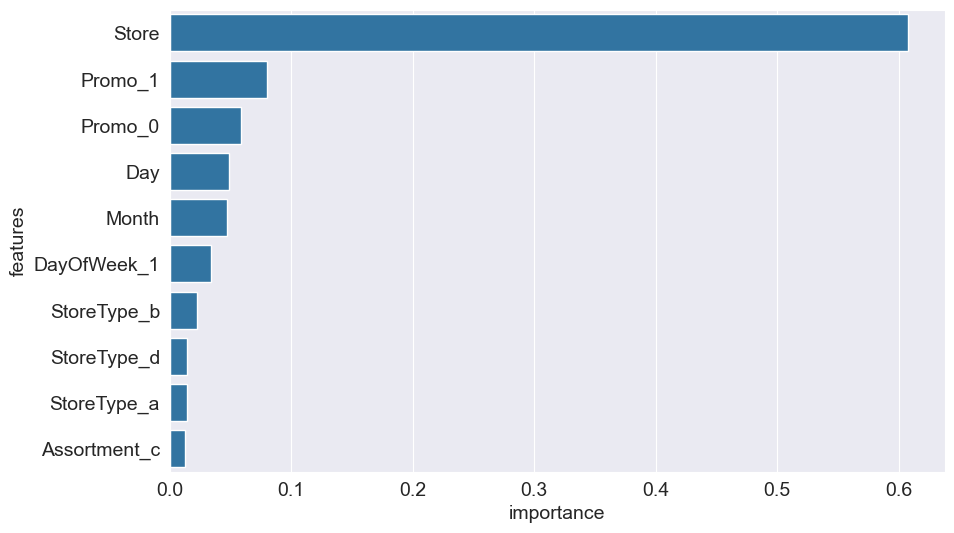

In [153]:
sns.barplot(data=importance_df.head(10),x='importance',y='features')

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
test_pred = rf.predict(X_test)

In [164]:
test_pred

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

In [166]:
submission_df=pd.read_csv('C:\\Users\\dell\\Downloads\\rossmann-store-sales\\sample_submission.csv')

In [167]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [168]:
submission_df['Sales'] = test_pred * test_df['Open'].astype('float')

In [169]:
submission_df.to_csv('submission.csv',index=None)

In [178]:
df=pd.read_csv('submission.csv')

'head' is not recognized as an internal or external command,
operable program or batch file.


In [175]:
df.head()

,Id,Sales
0,1,4258.01
1,2,7713.83
2,3,8775.70
3,4,6775.37
4,5,6492.47


In [176]:
from IPython.display import FileLink

In [177]:
FileLink('submission.csv')

C:\Users\dell\submission.csv

In [179]:
import pandas as pd

# Load submission file
df = pd.read_csv("submission.csv")

# Check for missing values
print(df.isna().sum())

# Option 1: Fill missing values with 0
df = df.fillna(0)

# Option 2: (better) Fill missing with mean of the column
# df['your_column_name'] = df['your_column_name'].fillna(df['your_column_name'].mean())

# Save cleaned file
df.to_csv("submission_clean.csv", index=False)


Id        0
Sales    11
dtype: int64


In [182]:
df1=pd.read_csv('submission_clean.csv')

In [183]:
df1.isnull().sum()

Id       0
Sales    0
dtype: int64

In [184]:
FileLink('submission_clean.csv')

C:\Users\dell\submission_clean.csv